In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [2]:
df.drop(columns=['PassengerId','Name','SibSp',"Parch","Ticket","Cabin","Embarked"], inplace = True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [3]:
df.corr()

C:\Users\Raj\AppData\Local\Temp\ipykernel_12536\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Pclass,Age,Fare,Survived
Pclass,1.000000,-0.369226,-0.549500,-0.338481
Age,-0.369226,1.000000,0.096067,-0.077221
Fare,-0.549500,0.096067,1.000000,0.257307
Survived,-0.338481,-0.077221,0.257307,1.000000


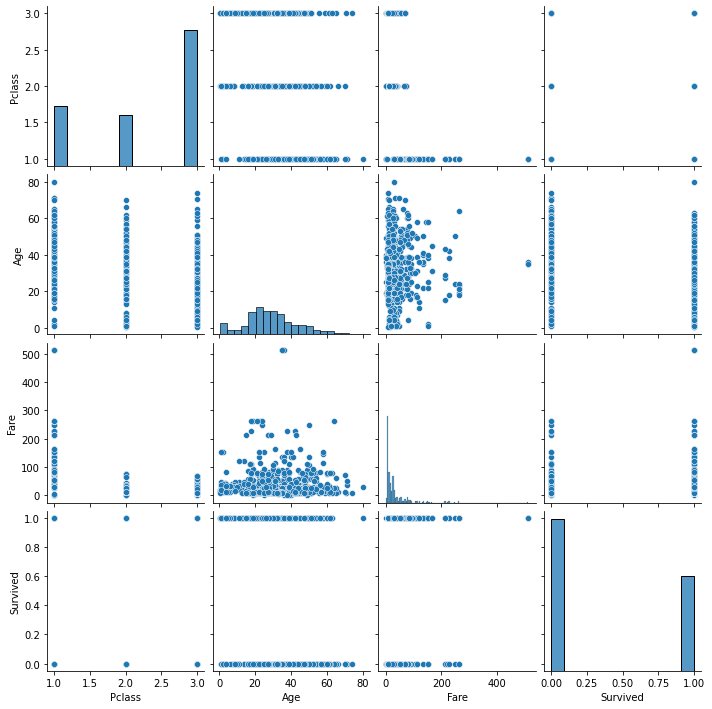

In [4]:
import seaborn as sns
sns.pairplot(df)

In [5]:
inputs = df[["Pclass","Sex","Age","Fare"]]
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [6]:
inputs["Sex"]= inputs["Sex"].map({"male":1,"female":0})
inputs.head()

C:\Users\Raj\AppData\Local\Temp\ipykernel_12536\346667813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs["Sex"]= inputs["Sex"].map({"male":1,"female":0})


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [7]:
inputs.isna().any()

Pclass    False
Sex       False
Age        True
Fare      False
dtype: bool

In [8]:
inputs["Age"][:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [9]:
inputs["Age"] = inputs["Age"].fillna(inputs["Age"].mean())    #without assigning, it will not efeect any changes
inputs.head()

C:\Users\Raj\AppData\Local\Temp\ipykernel_12536\424559633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs["Age"] = inputs["Age"].fillna(inputs["Age"].mean())    #without assigning, it will not efeect any changes


,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [10]:
inputs.isna().any()

Pclass    False
Sex       False
Age       False
Fare      False
dtype: bool

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,df["Survived"],test_size=0.2)

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
model = GaussianNB()

In [14]:
model.fit(X_train,y_train)

GaussianNB()

In [15]:
model.score(X_test,y_test)

0.7653631284916201

In [16]:
y_predicted = model.predict(X_test)

In [17]:
X_test[:10]

,Pclass,Sex,Age,Fare
763,1,0,36.000000,120.0000
352,3,1,15.000000,7.2292
660,1,1,50.000000,133.6500
577,1,0,39.000000,55.9000
437,2,0,24.000000,18.7500
214,3,1,29.699118,7.7500
216,3,0,27.000000,7.9250
547,2,1,29.699118,13.8625
326,3,1,61.000000,6.2375
771,3,1,48.000000,7.8542


In [18]:
model.predict(X_test[:10])

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [19]:
model.predict_proba(X_test[:10])

array([[2.45994290e-04, 9.99754006e-01],
       [9.61766520e-01, 3.82334797e-02],
       [1.43218979e-03, 9.98567810e-01],
       [4.25016480e-02, 9.57498352e-01],
       [2.85796575e-01, 7.14203425e-01],
       [9.70804529e-01, 2.91954713e-02],
       [4.79786044e-01, 5.20213956e-01],
       [9.38294724e-01, 6.17052756e-02],
       [9.60182046e-01, 3.98179536e-02],
       [9.69895396e-01, 3.01046037e-02]])

In [20]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_predicted))

0.03960143076136913


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[80, 23],
       [19, 57]], dtype=int64)

Text(69.0, 0.5, 'Truth')

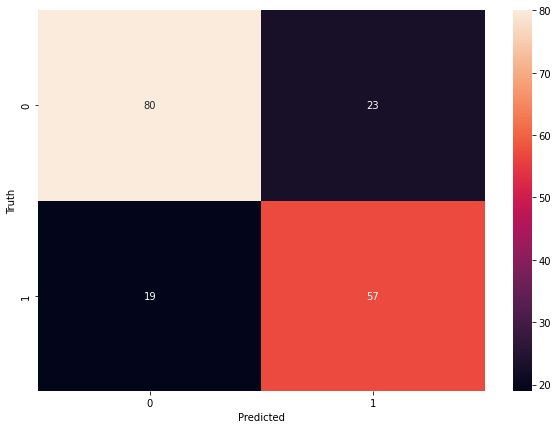

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')